In [1]:
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt 
import numpy as np 

In [2]:
df=pd.read_csv('cyberbullying_tweets.csv')


In [3]:
df

tweet_text cyberbullying_type
0      In other words #katandandre, your food was cra...  not_cyberbullying
1      Why is #aussietv so white? #MKR #theblock #ImA...  not_cyberbullying
2      @XochitlSuckkks a classy whore? Or more red ve...  not_cyberbullying
3      @Jason_Gio meh. :P  thanks for the heads up, b...  not_cyberbullying
4      @RudhoeEnglish This is an ISIS account pretend...  not_cyberbullying
...                                                  ...                ...
47687  Black ppl aren't expected to do anything, depe...          ethnicity
47688  Turner did not withhold his disappointment. Tu...          ethnicity
47689  I swear to God. This dumb nigger bitch. I have...          ethnicity
47690  Yea fuck you RT @therealexel: IF YOURE A NIGGE...          ethnicity
47691  Bro. U gotta chill RT @CHILLShrammy: Dog FUCK ...          ethnicity

[47692 rows x 2 columns]

In [4]:
df.head()

tweet_text cyberbullying_type
0  In other words #katandandre, your food was cra...  not_cyberbullying
1  Why is #aussietv so white? #MKR #theblock #ImA...  not_cyberbullying
2  @XochitlSuckkks a classy whore? Or more red ve...  not_cyberbullying
3  @Jason_Gio meh. :P  thanks for the heads up, b...  not_cyberbullying
4  @RudhoeEnglish This is an ISIS account pretend...  not_cyberbullying

# Data preprocessing 

In [5]:
df.isnull().sum()

tweet_text            0
cyberbullying_type    0
dtype: int64

In [6]:
df.describe()

tweet_text cyberbullying_type
count                                               47692              47692
unique                                              46017                  6
top     RT @sailorhg: the intro for my hardware hackin...           religion
freq                                                    2               7998

In [7]:
df.shape

(47692, 2)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47692 entries, 0 to 47691
Data columns (total 2 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   tweet_text          47692 non-null  object
 1   cyberbullying_type  47692 non-null  object
dtypes: object(2)
memory usage: 745.3+ KB


In [9]:
# Check for duplicates
print("\nNumber of duplicate rows:", df.duplicated().sum())


Number of duplicate rows: 36


In [10]:
# Explore the distribution of cyberbullying types
cyberbullying_distribution = df['cyberbullying_type'].value_counts()
print("\nDistribution of cyberbullying types:")
print(cyberbullying_distribution)


Distribution of cyberbullying types:
cyberbullying_type
religion               7998
age                    7992
gender                 7973
ethnicity              7961
not_cyberbullying      7945
other_cyberbullying    7823
Name: count, dtype: int64


# EDA

In [11]:
print("Summary Statistics:")
print(df.describe())

Summary Statistics:
                                               tweet_text cyberbullying_type
count                                               47692              47692
unique                                              46017                  6
top     RT @sailorhg: the intro for my hardware hackin...           religion
freq                                                    2               7998


###  distribution of cyberbullying types

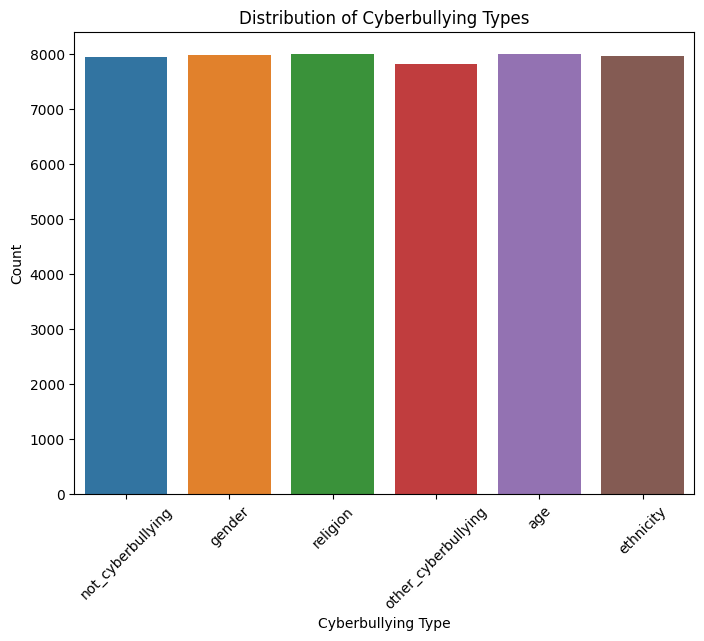

In [12]:
# Explore the distribution of cyberbullying types
plt.figure(figsize=(8, 6))
sns.countplot(x='cyberbullying_type', data=df)
plt.title("Distribution of Cyberbullying Types")
plt.xlabel("Cyberbullying Type")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()

### word cloud for cyberbullying tweets

In [13]:
from wordcloud import WordCloud

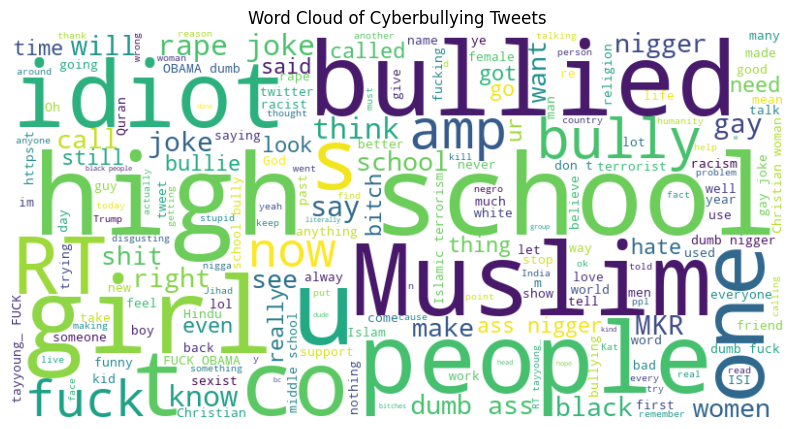

In [14]:
# Create a word cloud for cyberbullying tweets
all_tweets = ' '.join(df['tweet_text'])
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_tweets)

plt.figure(figsize=(10, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Word Cloud of Cyberbullying Tweets")
plt.show()

### Text Length Analysis

In [15]:
# Text Length Analysis
df['tweet_length'] = df['tweet_text'].apply(len)

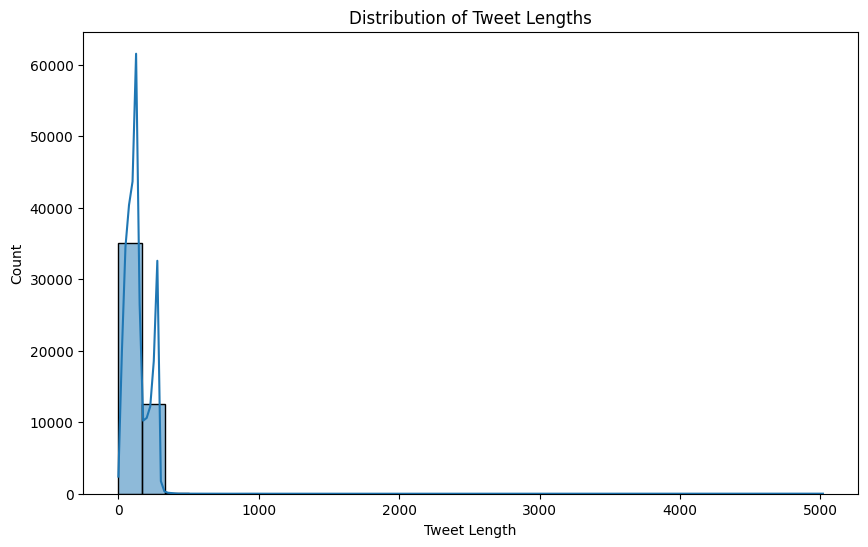

In [16]:

plt.figure(figsize=(10, 6))
sns.histplot(df['tweet_length'], bins=30, kde=True)
plt.title("Distribution of Tweet Lengths")
plt.xlabel("Tweet Length")
plt.ylabel("Count")
plt.show()


### Sentiment Analysis Distribution

In [17]:
from textblob import TextBlob

Text(0, 0.5, 'Count')

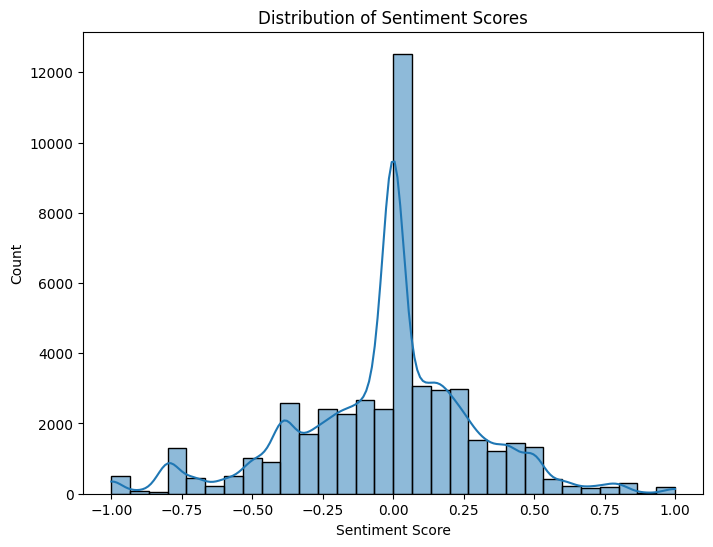

In [18]:
# Sentiment Analysis Distribution
df['sentiment'] = df['tweet_text'].apply(lambda x: TextBlob(x).sentiment.polarity)

plt.figure(figsize=(8, 6))
sns.histplot(df['sentiment'], bins=30, kde=True)
plt.title("Distribution of Sentiment Scores")
plt.xlabel("Sentiment Score")
plt.ylabel("Count")

### Top Words Analysis for Word Clouds

In [19]:
# Top Words Analysis for Word Clouds
def generate_wordcloud(cyberbullying_type):
    text = ' '.join(df[df['cyberbullying_type'] == cyberbullying_type]['tweet_text'])
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

    plt.figure(figsize=(10, 8))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(f"Word Cloud for {cyberbullying_type}")
    plt.show()


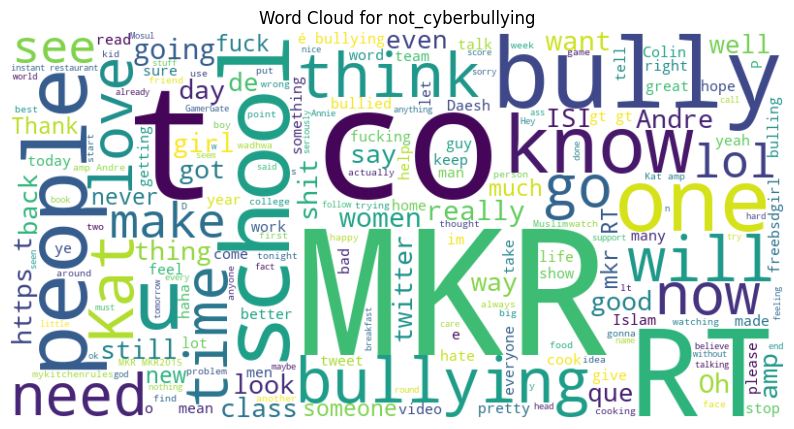

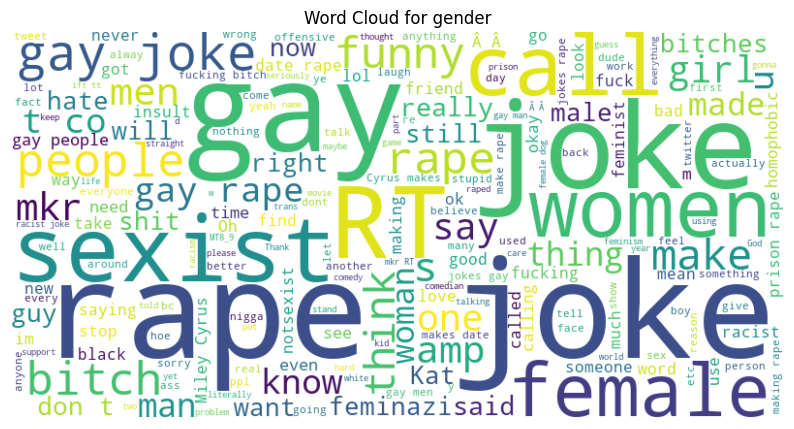

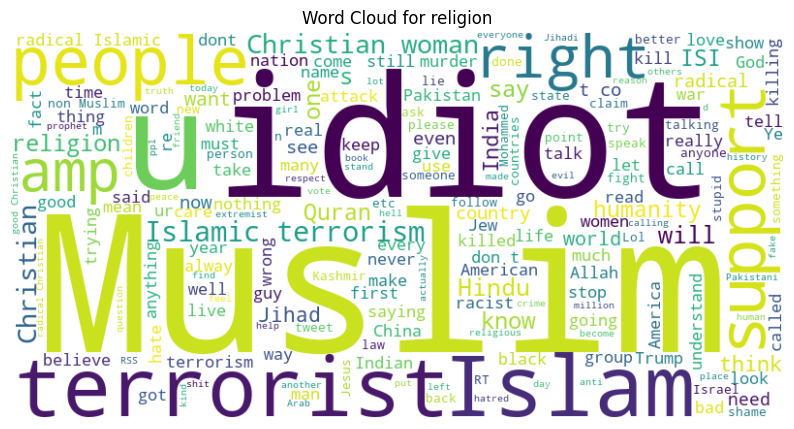

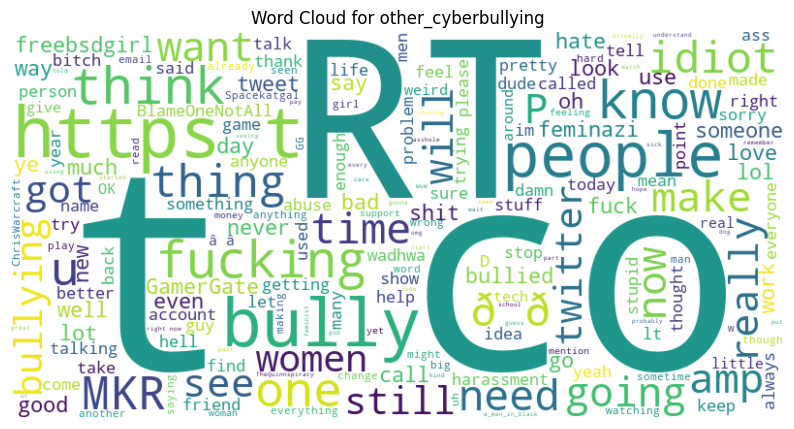

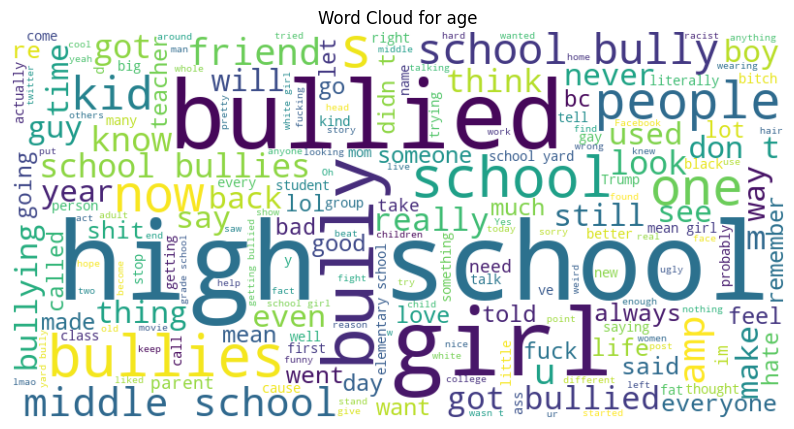

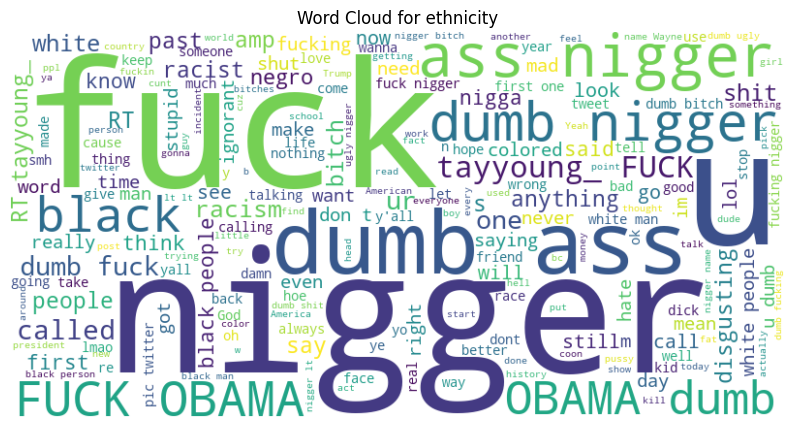

In [20]:
# Generate Word Clouds for each Cyberbullying Type
cyberbullying_types = df['cyberbullying_type'].unique()
for cyberbullying_type in cyberbullying_types:
    generate_wordcloud(cyberbullying_type)

# Sentiment analysis 

In [21]:
import nltk
from nltk.corpus import stopwords
from textblob import TextBlob
import string

In [22]:
import pandas as pd
import nltk
from nltk.corpus import stopwords
from textblob import TextBlob
import string

# Download NLTK resources (if not already downloaded)
nltk.download('punkt')
nltk.download('stopwords')


# Function to preprocess text
def preprocess_text(text):
    # Convert text to lowercase
    text = text.lower()
    
    # Remove punctuation
    text = ''.join([char for char in text if char not in string.punctuation])
    
    # Remove stopwords
    stop_words = set(stopwords.words('english'))
    words = text.split()
    filtered_words = [word for word in words if word.lower() not in stop_words]
    
    # Join the words back into a string
    text = ' '.join(filtered_words)
    
    return text

# Apply preprocessing to tweet_text column
df['cleaned_text'] = df['tweet_text'].apply(preprocess_text)

# Function to get sentiment label
def get_sentiment_label(sentiment_score):
    if sentiment_score > 0:
        return 'positive'
    elif sentiment_score < 0:
        return 'negative'
    else:
        return 'neutral'

# Function to analyze sentiment of text
def analyze_sentiment(text):
    blob = TextBlob(text)
    sentiment_score = blob.sentiment.polarity
    sentiment_label = get_sentiment_label(sentiment_score)
    return sentiment_label

# Apply sentiment analysis to cleaned_text column
df['sentiment'] = df['cleaned_text'].apply(analyze_sentiment)

# Print the first few rows of the dataframe with sentiment labels
print(df[['tweet_text', 'sentiment']].head())


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\SBMCODED\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\SBMCODED\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


                                          tweet_text sentiment
0  In other words #katandandre, your food was cra...   neutral
1  Why is #aussietv so white? #MKR #theblock #ImA...   neutral
2  @XochitlSuckkks a classy whore? Or more red ve...  positive
3  @Jason_Gio meh. :P  thanks for the heads up, b...  negative
4  @RudhoeEnglish This is an ISIS account pretend...   neutral


# Comparative Study of Cyberbullying Types

In [23]:
from nltk.corpus import stopwords


Distribution of Cyberbullying Types:
cyberbullying_type
religion               7998
age                    7992
gender                 7973
ethnicity              7961
not_cyberbullying      7945
other_cyberbullying    7823
Name: count, dtype: int64

Sentiment Analysis by Cyberbullying Type:
sentiment            negative  neutral  positive
cyberbullying_type                              
age                      2461      795      4736
ethnicity                6256      295      1410
gender                   2106     1605      4262
not_cyberbullying        1665     3870      2410
other_cyberbullying      2419     3193      2211
religion                 4075     1532      2391


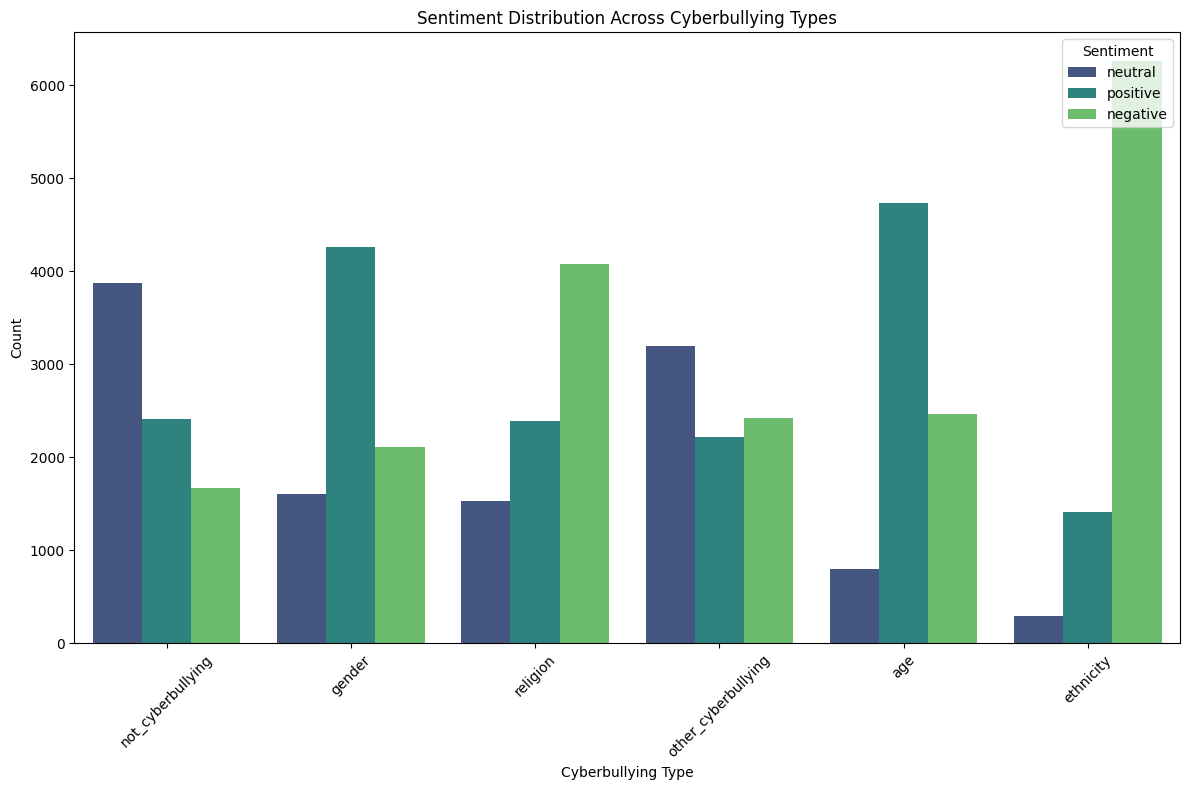

In [24]:
# Function to preprocess text
def preprocess_text(text):
    # Convert text to lowercase
    text = text.lower()
    
    # Remove punctuation
    text = ''.join([char for char in text if char not in string.punctuation])
    
    # Remove stopwords
    stop_words = set(stopwords.words('english'))
    words = text.split()
    filtered_words = [word for word in words if word.lower() not in stop_words]
    
    # Join the words back into a string
    text = ' '.join(filtered_words)
    
    return text

# Apply preprocessing to tweet_text column
df['cleaned_text'] = df['tweet_text'].apply(preprocess_text)

# Function to get sentiment label
def get_sentiment_label(sentiment_score):
    if sentiment_score > 0:
        return 'positive'
    elif sentiment_score < 0:
        return 'negative'
    else:
        return 'neutral'

# Function to analyze sentiment of text
def analyze_sentiment(text):
    blob = TextBlob(text)
    sentiment_score = blob.sentiment.polarity
    sentiment_label = get_sentiment_label(sentiment_score)
    return sentiment_label

# Apply sentiment analysis to cleaned_text column and create sentiment column
df['sentiment'] = df['cleaned_text'].apply(analyze_sentiment)

# Investigate the distribution of cyberbullying types
cyberbullying_types = df['cyberbullying_type'].unique()
cyberbullying_distribution = df['cyberbullying_type'].value_counts()

print("Distribution of Cyberbullying Types:")
print(cyberbullying_distribution)

# Analyze sentiment for each cyberbullying type
sentiment_by_type = df.groupby(['cyberbullying_type', 'sentiment']).size().unstack(fill_value=0)

print("\nSentiment Analysis by Cyberbullying Type:")
print(sentiment_by_type)

# Plotting the sentiment distribution for each cyberbullying type
plt.figure(figsize=(12, 8))
sns.countplot(x='cyberbullying_type', hue='sentiment', data=df, palette='viridis')
plt.title("Sentiment Distribution Across Cyberbullying Types")
plt.xlabel("Cyberbullying Type")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.legend(title='Sentiment', loc='upper right')
plt.tight_layout()
plt.show()

# feature engineering 

In [25]:
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer

In [26]:
# Function to preprocess text
def preprocess_text(text):
    # Convert text to lowercase
    text = text.lower()
    
    # Remove punctuation
    text = ''.join([char for char in text if char not in string.punctuation])
    
    # Remove stopwords
    stop_words = set(stopwords.words('english'))
    words = text.split()
    filtered_words = [word for word in words if word.lower() not in stop_words]
    
    # Join the words back into a string
    text = ' '.join(filtered_words)
    
    return text


In [27]:
# Apply preprocessing to tweet_text column
df['cleaned_text'] = df['tweet_text'].apply(preprocess_text)

# Calculate tweet length
df['tweet_length'] = df['tweet_text'].apply(len)

# Create TF-IDF features
tfidf_vectorizer = TfidfVectorizer(max_features=1000)  # You can adjust max_features as needed
tfidf_features = tfidf_vectorizer.fit_transform(df['cleaned_text'])

# Convert TF-IDF features to a DataFrame
tfidf_df = pd.DataFrame(tfidf_features.toarray(), columns=tfidf_vectorizer.get_feature_names_out())

# Count frequency of certain words
# Example: Count the frequency of the word 'cyberbullying'
df['cyberbullying_freq'] = df['cleaned_text'].apply(lambda x: x.split().count('cyberbullying'))

# Extract hashtags
# Example: Extract hashtags from the text
df['hashtags'] = df['tweet_text'].apply(lambda x: [word[1:] for word in x.split() if word.startswith('#')])

# Print the first few rows of the dataframe with the new features
print(df[['tweet_text', 'cleaned_text', 'tweet_length', 'cyberbullying_freq', 'hashtags']].head())
print("\nShape of TF-IDF Features DataFrame:", tfidf_df.shape)

                                          tweet_text  \
0  In other words #katandandre, your food was cra...   
1  Why is #aussietv so white? #MKR #theblock #ImA...   
2  @XochitlSuckkks a classy whore? Or more red ve...   
3  @Jason_Gio meh. :P  thanks for the heads up, b...   
4  @RudhoeEnglish This is an ISIS account pretend...   

                                        cleaned_text  tweet_length  \
0            words katandandre food crapilicious mkr            61   
1  aussietv white mkr theblock imacelebrityau tod...           115   
2    xochitlsuckkks classy whore red velvet cupcakes            60   
3  jasongio meh p thanks heads concerned another ...           103   
4  rudhoeenglish isis account pretending kurdish ...           103   

   cyberbullying_freq                                           hashtags  
0                   0                                [katandandre,, mkr]  
1                   0  [aussietv, MKR, theblock, ImACelebrityAU, toda...  
2                

## model training and evaluation 

In [28]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense

In [29]:
# Create feature matrix X and target y
X = df['cleaned_text']
y = df['sentiment']


#### training and testing the dataset


training = 80% 

testing = 20%

In [30]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


#### TF-IDF Vectorizer for Logistic Regression and Naive Bayes

In [31]:
# TF-IDF Vectorizer for Logistic Regression and Naive Bayes
tfidf_vectorizer = TfidfVectorizer(max_features=1000)
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)

####  Logistic Regression

In [32]:
# Logistic Regression
lr_model = LogisticRegression()
lr_model.fit(X_train_tfidf, y_train)
lr_pred = lr_model.predict(X_test_tfidf)


C:\Users\SBMCODED\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


#### Naive Bayes

In [33]:
# Naive Bayes
nb_model = MultinomialNB()
nb_model.fit(X_train_tfidf, y_train)
nb_pred = nb_model.predict(X_test_tfidf)

#### LSTM Model

In [34]:
# LSTM Model
tokenizer = Tokenizer(num_words=1000)
tokenizer.fit_on_texts(X_train)

In [36]:
X_train_seq = tokenizer.texts_to_sequences(X_train)
X_test_seq = tokenizer.texts_to_sequences(X_test)

max_len = max(len(seq) for seq in X_train_seq)
X_train_pad = pad_sequences(X_train_seq, maxlen=max_len, padding='post')
X_test_pad = pad_sequences(X_test_seq, maxlen=max_len, padding='post')

lstm_model = Sequential([
    Embedding(input_dim=len(tokenizer.word_index)+1, output_dim=100, input_length=max_len),
    LSTM(units=64),
    Dense(3, activation='softmax')
])

lstm_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
lstm_model.fit(X_train_pad, pd.get_dummies(y_train), epochs=5, batch_size=32, validation_split=0.1)




Epoch 1/5
1074/1074 [==============================] - 560s 517ms/step - loss: 1.0763 - accuracy: 0.3931 - val_loss: 1.0734 - val_accuracy: 0.4067
Epoch 2/5
1074/1074 [==============================] - 671s 625ms/step - loss: 1.0760 - accuracy: 0.3970 - val_loss: 1.0725 - val_accuracy: 0.4067
Epoch 3/5
1074/1074 [==============================] - 719s 669ms/step - loss: 1.0758 - accuracy: 0.3970 - val_loss: 1.0735 - val_accuracy: 0.4067
Epoch 4/5
1074/1074 [==============================] - 728s 678ms/step - loss: 1.0756 - accuracy: 0.3982 - val_loss: 1.0727 - val_accuracy: 0.4067
Epoch 5/5
1074/1074 [==============================] - 701s 652ms/step - loss: 1.0756 - accuracy: 0.3982 - val_loss: 1.0725 - val_accuracy: 0.4067


#### Get probabilities for each class

In [37]:
# Get probabilities for each class
lstm_probs = lstm_model.predict(X_test_pad)
# Choose the class with the highest probability for predictions
lstm_pred = np.argmax(lstm_probs, axis=1)


299/299 [==============================] - 37s 114ms/step


#### Mapping predicted labels to numeric format

In [46]:


# Evaluate the models
def evaluate_model(y_true, y_pred):
    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred, average='weighted')
    recall = recall_score(y_true, y_pred, average='weighted')
    f1 = f1_score(y_true, y_pred, average='weighted')
    return accuracy, precision, recall, f1

# Evaluate Logistic Regression
lr_accuracy, lr_precision, lr_recall, lr_f1 = evaluate_model(y_test, lr_pred)

# Evaluate Naive Bayes
nb_accuracy, nb_precision, nb_recall, nb_f1 = evaluate_model(y_test, nb_pred)

# Evaluate LSTM
lstm_accuracy, lstm_precision, lstm_recall, lstm_f1 = evaluate_model(y_test, lstm_pred)


C:\Users\SBMCODED\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


#### result for logistic regression 

In [47]:

# Print the evaluation results
print("Logistic Regression:")
print("Accuracy:", lr_accuracy)
print("Precision:", lr_precision)
print("Recall:", lr_recall)
print("F1 Score:", lr_f1)
print("\n")



Logistic Regression:
Accuracy: 0.8888772408009226
Precision: 0.8945751214680728
Recall: 0.8888772408009226
F1 Score: 0.8892505176369394




## Logistic Regression:
### Accuracy: 0.8888772408009226
### Precision: 0.8945751214680728
### Recall: 0.8888772408009226
### F1 Score: 0.8892505176369394

#### result for naive bayes 


In [48]:
print("Naive Bayes:")
print("Accuracy:", nb_accuracy)
print("Precision:", nb_precision)
print("Recall:", nb_recall)
print("F1 Score:", nb_f1)
print("\n")



Naive Bayes:
Accuracy: 0.7372890240067093
Precision: 0.7400201868884821
Recall: 0.7372890240067093
F1 Score: 0.7312357400707216




## Naive Bayes:
## Accuracy: 0.7372890240067093
## Precision: 0.7400201868884823
## Recall: 0.7372890240067093
## F1 Score: 0.7312357400707216

#### result for LSTM 

In [49]:
print("LSTM:")
print("Accuracy:", lstm_accuracy)
print("Precision:", lstm_precision)
print("Recall:", lstm_recall)
print("F1 Score:", lstm_f1)


LSTM:
Accuracy: 0.3633504560226439
Precision: 0.13202355389186327
Recall: 0.3633504560226439
F1 Score: 0.1936751527219506


## LSTM:
## Accuracy: 0.3633504560226439
## Precision: 0.13202355389186327
## Recall: 0.3633504560226439
## F1 Score: 0.1936751527219506

# comparative analysis 

In [50]:
# Create a DataFrame to store evaluation metrics
evaluation_results = pd.DataFrame({
    'Model': ['Logistic Regression', 'Naive Bayes', 'LSTM'],
    'Accuracy': [lr_accuracy, nb_accuracy, lstm_accuracy],
    'Precision': [lr_precision, nb_precision, lstm_precision],
    'Recall': [lr_recall, nb_recall, lstm_recall],
    'F1 Score': [lr_f1, nb_f1, lstm_f1]
})

# Print the evaluation results
print("Sentiment Analysis Model Evaluation Results:")
print(evaluation_results)


Sentiment Analysis Model Evaluation Results:
                 Model  Accuracy  Precision    Recall  F1 Score
0  Logistic Regression  0.888877   0.894575  0.888877  0.889251
1          Naive Bayes  0.737289   0.740020  0.737289  0.731236
2                 LSTM  0.363350   0.132024  0.363350  0.193675


In [51]:
# Create a DataFrame for sentiment distribution
sentiment_distribution = df.groupby(['cyberbullying_type', 'sentiment']).size().unstack(fill_value=0)

# Print sentiment distribution
print("\nSentiment Distribution within Each Cyberbullying Type:")
print(sentiment_distribution)



Sentiment Distribution within Each Cyberbullying Type:
sentiment            negative  neutral  positive
cyberbullying_type                              
age                      2461      795      4736
ethnicity                6256      295      1410
gender                   2106     1605      4262
not_cyberbullying        1665     3870      2410
other_cyberbullying      2419     3193      2211
religion                 4075     1532      2391


#### model comparison

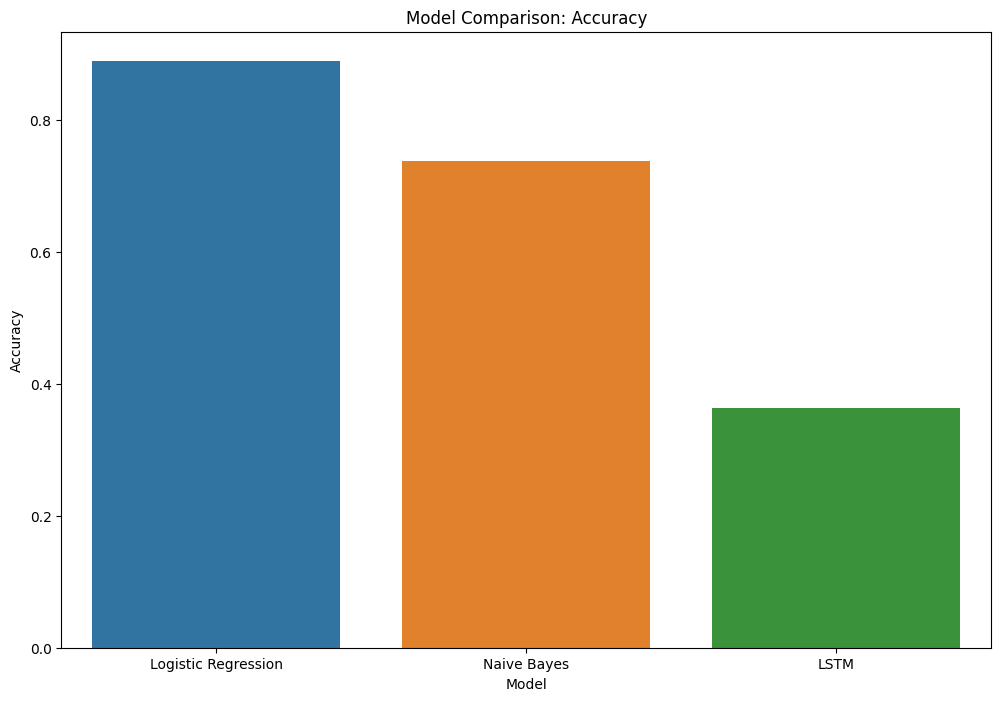

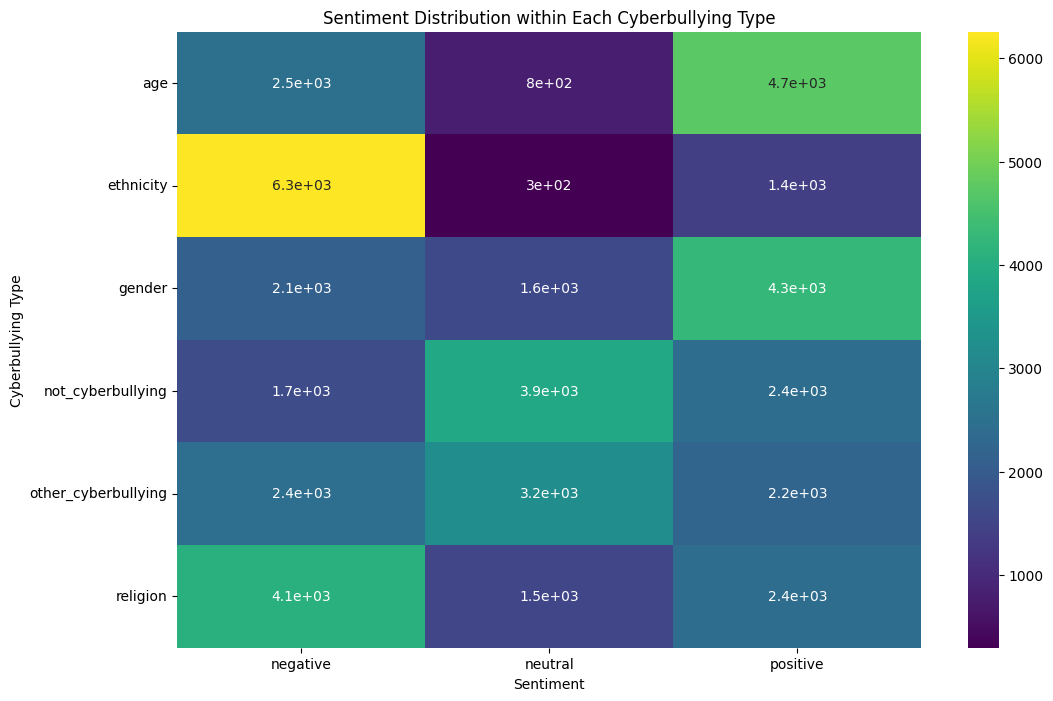

In [52]:


# Create a bar plot for model comparison
plt.figure(figsize=(12, 8))
sns.barplot(x='Model', y='Accuracy', data=evaluation_results)
plt.title('Model Comparison: Accuracy')
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.show()

# Create a heatmap for sentiment distribution
plt.figure(figsize=(12, 8))
sns.heatmap(sentiment_distribution, annot=True, cmap='viridis')
plt.title('Sentiment Distribution within Each Cyberbullying Type')
plt.xlabel('Sentiment')
plt.ylabel('Cyberbullying Type')
plt.show()


# hate speech and offensive langauage 

In [53]:
df1=pd.read_csv('labeled_data.csv')

In [54]:
df1

Unnamed: 0  count  hate_speech  offensive_language  neither  class  \
0               0      3            0                   0        3      2   
1               1      3            0                   3        0      1   
2               2      3            0                   3        0      1   
3               3      3            0                   2        1      1   
4               4      6            0                   6        0      1   
...           ...    ...          ...                 ...      ...    ...   
24778       25291      3            0                   2        1      1   
24779       25292      3            0                   1        2      2   
24780       25294      3            0                   3        0      1   
24781       25295      6            0                   6        0      1   
24782       25296      3            0                   0        3      2   

                                                   tweet  
0      !!! RT @mayasolovely: As a woman you shouldn't...  
1      !!!!! RT @mleew17: boy dats cold...tyga dwn ba...  
2      !!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...  
3      !!!!!!!!! RT @C_G_Anderson: @viva_based she lo...  
4      !!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...  
...                                                  ...  
24778  you's a muthaf***in lie &#8220;@LifeAsKing: @2...  
24779  you've gone and broke the wrong heart baby, an...  
24780  young buck wanna eat!!.. dat nigguh like I ain...  
24781              youu got wild bitches tellin you lies  
24782  ~~Ruffled | Ntac Eileen Dahlia - Beautiful col...  

[24783 rows x 7 columns]

#### data preprocessing 

In [55]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24783 entries, 0 to 24782
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Unnamed: 0          24783 non-null  int64 
 1   count               24783 non-null  int64 
 2   hate_speech         24783 non-null  int64 
 3   offensive_language  24783 non-null  int64 
 4   neither             24783 non-null  int64 
 5   class               24783 non-null  int64 
 6   tweet               24783 non-null  object
dtypes: int64(6), object(1)
memory usage: 1.3+ MB


In [56]:
df1.describe()

Unnamed: 0         count   hate_speech  offensive_language  \
count  24783.000000  24783.000000  24783.000000        24783.000000   
mean   12681.192027      3.243473      0.280515            2.413711   
std     7299.553863      0.883060      0.631851            1.399459   
min        0.000000      3.000000      0.000000            0.000000   
25%     6372.500000      3.000000      0.000000            2.000000   
50%    12703.000000      3.000000      0.000000            3.000000   
75%    18995.500000      3.000000      0.000000            3.000000   
max    25296.000000      9.000000      7.000000            9.000000   

            neither         class  
count  24783.000000  24783.000000  
mean       0.549247      1.110277  
std        1.113299      0.462089  
min        0.000000      0.000000  
25%        0.000000      1.000000  
50%        0.000000      1.000000  
75%        0.000000      1.000000  
max        9.000000      2.000000

In [57]:
df1.shape

(24783, 7)

In [58]:
df1.isnull().sum()

Unnamed: 0            0
count                 0
hate_speech           0
offensive_language    0
neither               0
class                 0
tweet                 0
dtype: int64

In [59]:
df1.columns


Index(['Unnamed: 0', 'count', 'hate_speech', 'offensive_language', 'neither',
       'class', 'tweet'],
      dtype='object')

In [60]:
df1=df1.drop('Unnamed: 0',axis=1)

In [61]:
df1.head()

count  hate_speech  offensive_language  neither  class  \
0      3            0                   0        3      2   
1      3            0                   3        0      1   
2      3            0                   3        0      1   
3      3            0                   2        1      1   
4      6            0                   6        0      1   

                                               tweet  
0  !!! RT @mayasolovely: As a woman you shouldn't...  
1  !!!!! RT @mleew17: boy dats cold...tyga dwn ba...  
2  !!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...  
3  !!!!!!!!! RT @C_G_Anderson: @viva_based she lo...  
4  !!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...

In [62]:
df1.columns

Index(['count', 'hate_speech', 'offensive_language', 'neither', 'class',
       'tweet'],
      dtype='object')

In [63]:
# Explore the distribution
hate_count = df1['hate_speech'].sum()
offensive_count = df1['offensive_language'].sum()
neither_count = df1['neither'].sum()

total_tweets = len(df1)
hate_percentage = (hate_count / total_tweets) * 100
offensive_percentage = (offensive_count / total_tweets) * 100
neither_percentage = (neither_count / total_tweets) * 100



## EDA (exploratory data analysis)

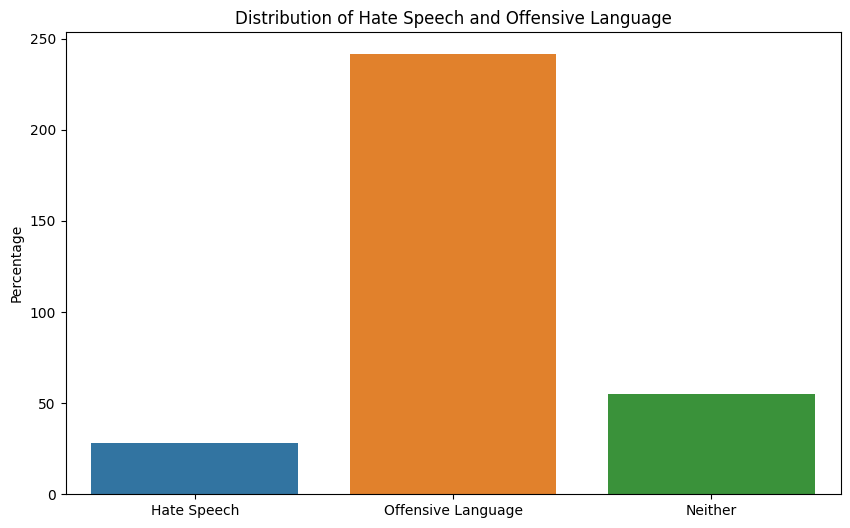

In [64]:
# Visualize the distribution
plt.figure(figsize=(10, 6))
sns.barplot(x=['Hate Speech', 'Offensive Language', 'Neither'], y=[hate_percentage, offensive_percentage, neither_percentage])
plt.title('Distribution of Hate Speech and Offensive Language')
plt.ylabel('Percentage')
plt.show()

##### Distribution of Hate Speech Count

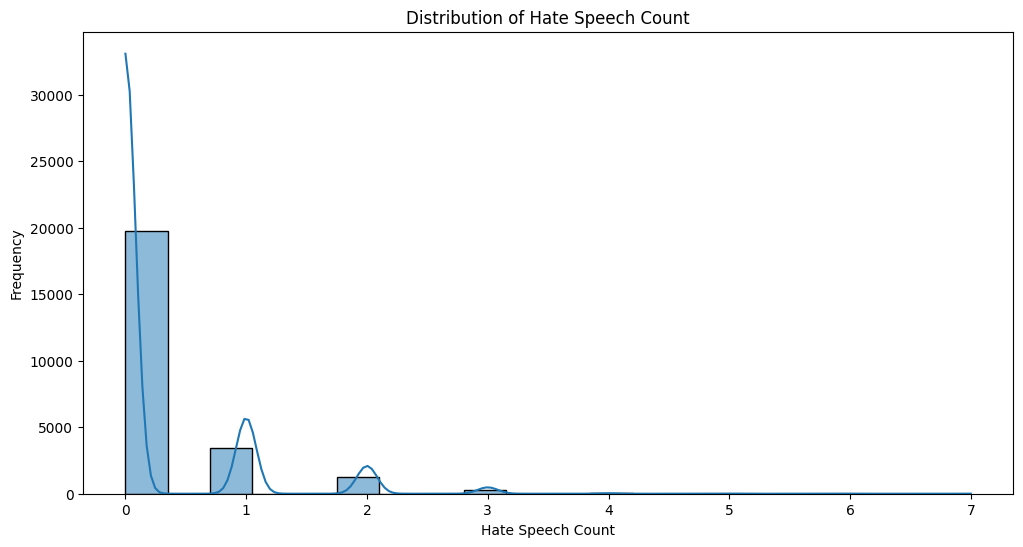

In [65]:
# Distribution of Hate Speech Count
plt.figure(figsize=(12, 6))
sns.histplot(data=df1, x='hate_speech', bins=20, kde=True)
plt.xlabel('Hate Speech Count')
plt.ylabel('Frequency')
plt.title('Distribution of Hate Speech Count')
plt.show()

##### Distribution of Offensive Language Count

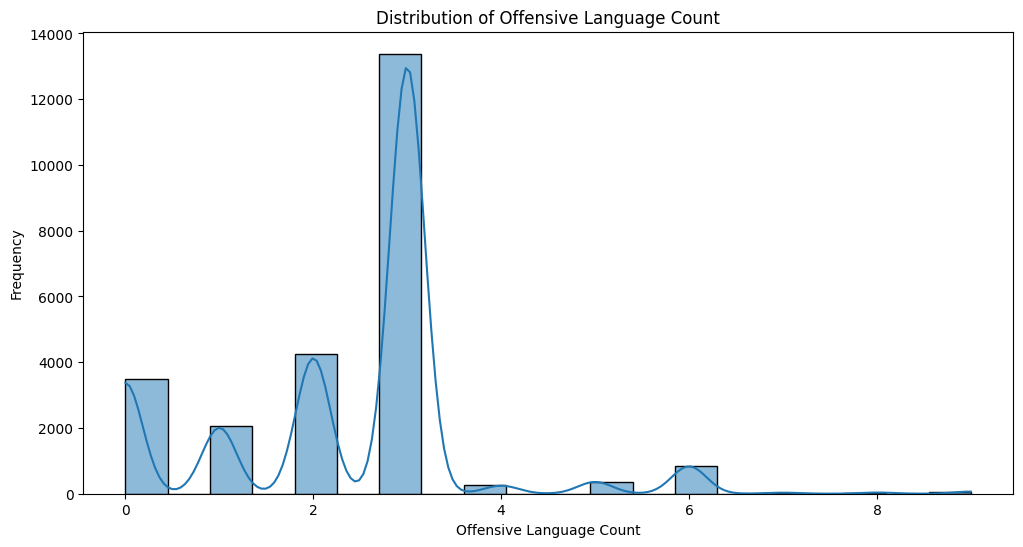

In [66]:
# Distribution of Offensive Language Count
plt.figure(figsize=(12, 6))
sns.histplot(data=df1, x='offensive_language', bins=20, kde=True)
plt.xlabel('Offensive Language Count')
plt.ylabel('Frequency')
plt.title('Distribution of Offensive Language Count')
plt.show()


##### Pairplot to explore relationships

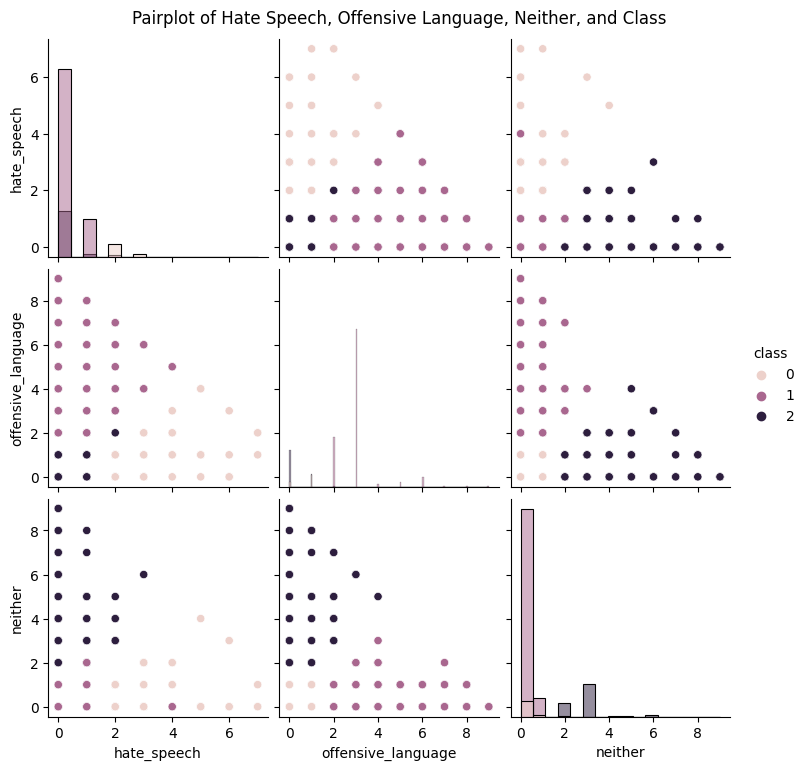

In [67]:
# Pairplot to explore relationships
sns.pairplot(df1[['hate_speech', 'offensive_language', 'neither', 'class']], hue='class', diag_kind='hist')
plt.suptitle('Pairplot of Hate Speech, Offensive Language, Neither, and Class', y=1.02)
plt.show()

##### Correlation Heatmap

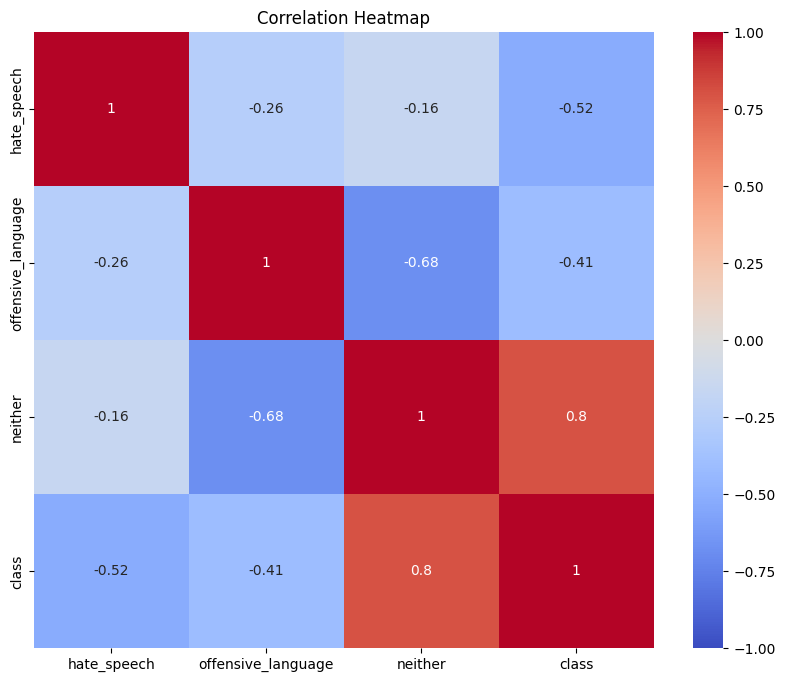

In [68]:
# Correlation Heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(df1[['hate_speech', 'offensive_language', 'neither', 'class']].corr(), annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Heatmap')
plt.show()

##### word count 

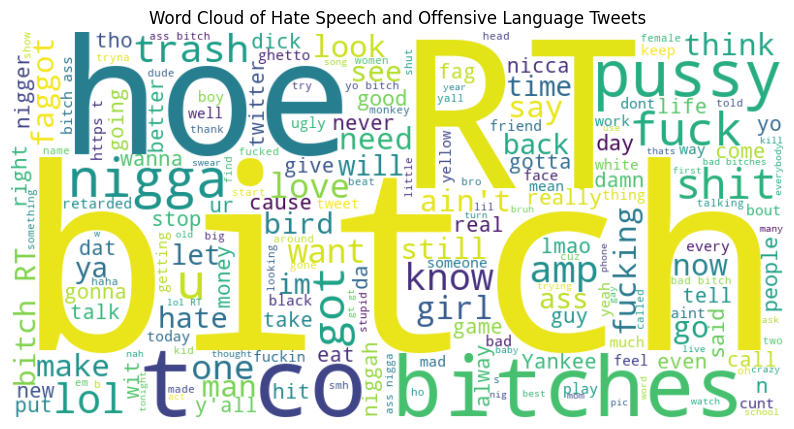

In [69]:
from wordcloud import WordCloud


# Combine all tweets into a single string
all_tweets = ' '.join(df1['tweet'])

# Create a WordCloud object
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_tweets)

# Plot the Word Cloud
plt.figure(figsize=(10, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Word Cloud of Hate Speech and Offensive Language Tweets")
plt.show()

##### most common words

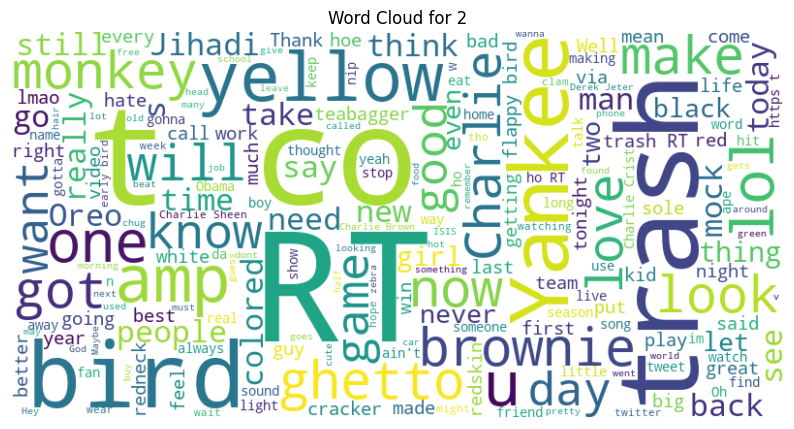

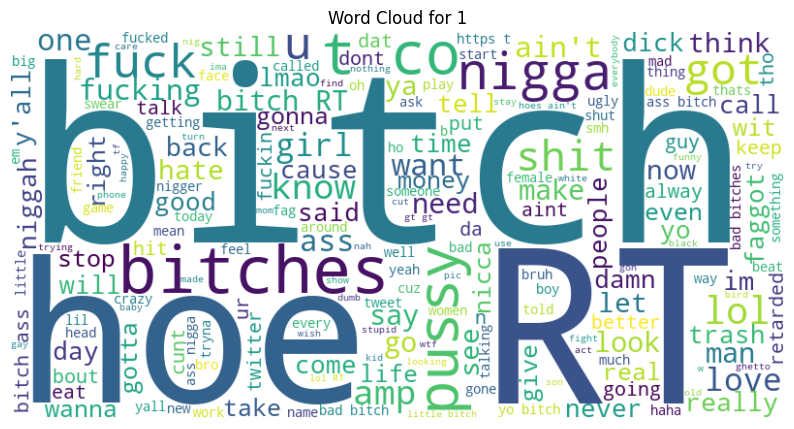

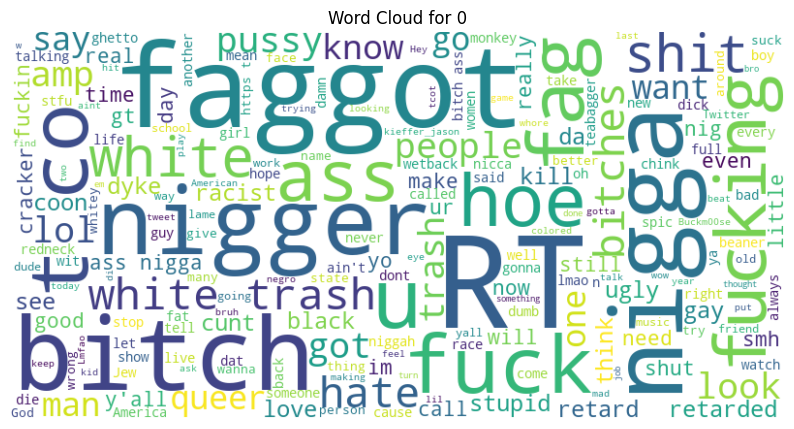

In [70]:
def generate_wordcloud(category):
    text = ' '.join(df1[df1['class'] == category]['tweet'])
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

    plt.figure(figsize=(10, 8))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(f"Word Cloud for {category}")
    plt.show()

# Generate Word Clouds for each category
categories = df1['class'].unique()
for category in categories:
    generate_wordcloud(category)

##  sentiment analysis 

In [71]:
import re
from sklearn.preprocessing import LabelEncoder
import nltk
import string
from nltk.corpus import stopwords
from nltk.sentiment.vader import SentimentIntensityAnalyzer

In [72]:

# Download NLTK resources (if not already downloaded)
nltk.download('vader_lexicon')
nltk.download('stopwords')


# Preprocess the tweet_text column
def preprocess_text(text):
    # Convert to lowercase
    text = text.lower()
    
    # Remove punctuation
    text = ''.join([char for char in text if char not in string.punctuation])
    
    # Remove stopwords
    stopwords_list = set(stopwords.words('english'))
    tokens = text.split()
    text = ' '.join([word for word in tokens if word not in stopwords_list])
    
    return text

df1['cleaned_text'] = df1['tweet'].apply(preprocess_text)

# Perform sentiment analysis using NLTK's VADER (Valence Aware Dictionary and sEntiment Reasoner)
sid = SentimentIntensityAnalyzer()

def get_sentiment_score(text):
    sentiment_score = sid.polarity_scores(text)
    return sentiment_score['compound']

# Assign sentiment labels to each tweet
df1['sentiment_score'] = df1['cleaned_text'].apply(get_sentiment_score)

def assign_sentiment_label(score):
    if score >= 0.05:
        return 'positive'
    elif score <= -0.05:
        return 'negative'
    else:
        return 'neutral'

df1['sentiment_label'] = df1['sentiment_score'].apply(assign_sentiment_label)

# Print the first few rows with sentiment labels
print(df1[['tweet', 'sentiment_label']].head(10))

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\SBMCODED\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\SBMCODED\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


                                               tweet sentiment_label
0  !!! RT @mayasolovely: As a woman you shouldn't...        positive
1  !!!!! RT @mleew17: boy dats cold...tyga dwn ba...        negative
2  !!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...        negative
3  !!!!!!!!! RT @C_G_Anderson: @viva_based she lo...        positive
4  !!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...        negative
5  !!!!!!!!!!!!!!!!!!"@T_Madison_x: The shit just...        negative
6  !!!!!!"@__BrighterDays: I can not just sit up ...        negative
7  !!!!&#8220;@selfiequeenbri: cause I'm tired of...        negative
8  " &amp; you might not get ya bitch back &amp; ...        negative
9  " @rhythmixx_ :hobbies include: fighting Maria...        negative


Distribution of Categories:
class
1    19190
2     4163
0     1430
Name: count, dtype: int64

Sentiment Analysis by Category:
sentiment  negative  neutral  positive
class                                 
0               550      570       310
1              5825     8031      5334
2               779     1895      1489


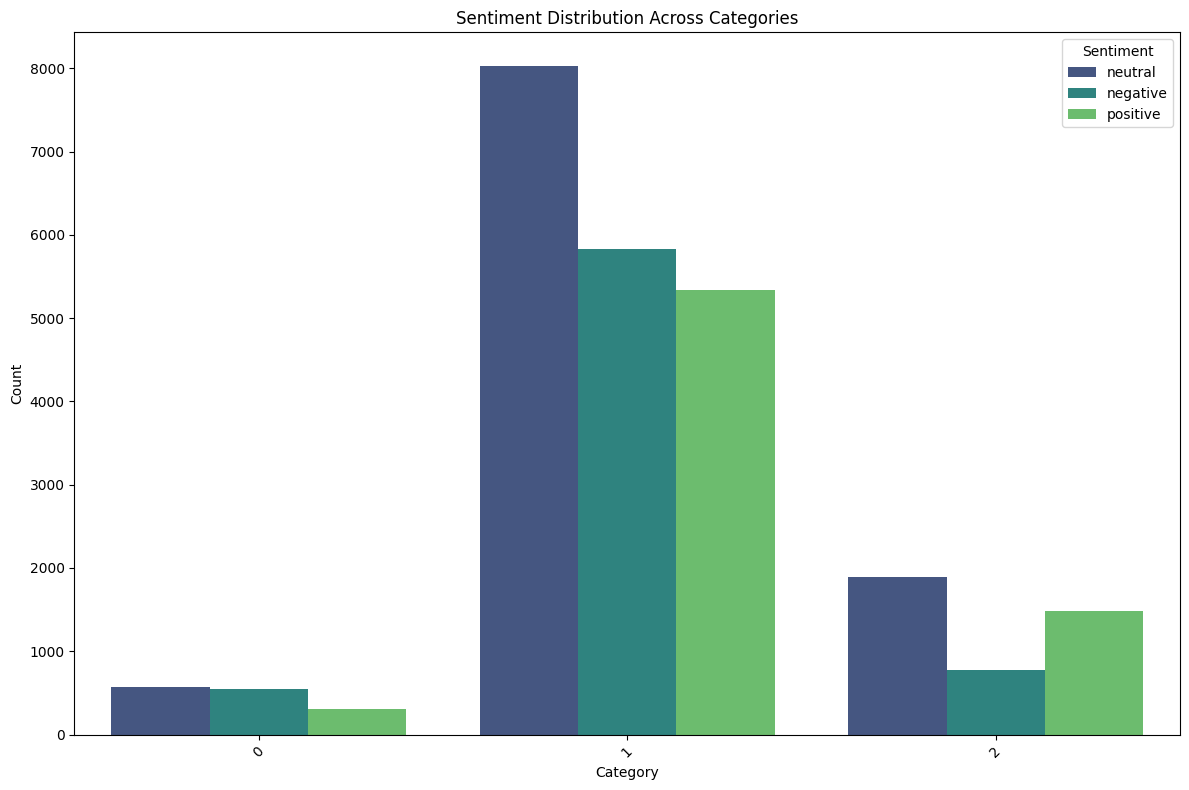

In [73]:
# Function to preprocess text
def preprocess_text(text):
    # Convert text to lowercase
    text = text.lower()
    
    # Remove punctuation
    text = ''.join([char for char in text if char not in string.punctuation])
    
    # Remove stopwords
    stop_words = set(stopwords.words('english'))
    words = text.split()
    filtered_words = [word for word in words if word.lower() not in stop_words]
    
    # Join the words back into a string
    text = ' '.join(filtered_words)
    
    return text

# Apply preprocessing to tweet column
df1['cleaned_text'] = df1['tweet'].apply(preprocess_text)

# Function to get sentiment label
def get_sentiment_label(sentiment_score):
    if sentiment_score > 0:
        return 'positive'
    elif sentiment_score < 0:
        return 'negative'
    else:
        return 'neutral'

# Function to analyze sentiment of text
def analyze_sentiment(text):
    blob = TextBlob(text)
    sentiment_score = blob.sentiment.polarity
    sentiment_label = get_sentiment_label(sentiment_score)
    return sentiment_label

# Apply sentiment analysis to cleaned_text column and create sentiment column
df1['sentiment'] = df1['cleaned_text'].apply(analyze_sentiment)

# Investigate the distribution of categories
categories = df1['class'].unique()
category_distribution = df1['class'].value_counts()

print("Distribution of Categories:")
print(category_distribution)

# Analyze sentiment for each category
sentiment_by_category = df1.groupby(['class', 'sentiment']).size().unstack(fill_value=0)

print("\nSentiment Analysis by Category:")
print(sentiment_by_category)

# Plotting the sentiment distribution for each category
plt.figure(figsize=(12, 8))
sns.countplot(x='class', hue='sentiment', data=df1, palette='viridis')
plt.title("Sentiment Distribution Across Categories")
plt.xlabel("Category")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.legend(title='Sentiment', loc='upper right')
plt.tight_layout()
plt.show()

## feature engineering 

In [74]:


# TF-IDF Vectorizer for text features
tfidf_vectorizer = TfidfVectorizer(max_features=1000)
X_tfidf = tfidf_vectorizer.fit_transform(df1['cleaned_text'])

# Create DataFrame with TF-IDF features
tfidf_df = pd.DataFrame(X_tfidf.toarray(), columns=tfidf_vectorizer.get_feature_names_out())

# Adding message length as a feature
df1['message_length'] = df1['cleaned_text'].apply(lambda x: len(x))

# Frequency of certain words as additional features
# Here, we can create features for specific words related to hate speech or offensive language
# For example, we'll count the occurrences of "hate", "racist", "offensive", "slur", "violence"
hate_words = ["hate", "racist", "offensive", "slur", "violence"]
for word in hate_words:
    df1[word + '_count'] = df1['cleaned_text'].apply(lambda x: x.count(word))

# Combining TF-IDF features with additional features
df1_features = pd.concat([tfidf_df, df1[['message_length']]], axis=1)

# Display the first few rows of the feature-engineered DataFrame
print("Feature-Engineered DataFrame:")
print(df1_features.head())


Feature-Engineered DataFrame:
    10  100   12  128076  128129  128175  128514  128514128514  \
0  0.0  0.0  0.0     0.0     0.0     0.0     0.0           0.0   
1  0.0  0.0  0.0     0.0     0.0     0.0     0.0           0.0   
2  0.0  0.0  0.0     0.0     0.0     0.0     0.0           0.0   
3  0.0  0.0  0.0     0.0     0.0     0.0     0.0           0.0   
4  0.0  0.0  0.0     0.0     0.0     0.0     0.0           0.0   

   128514128514128514  128514128514128514128514  ...  yesterday  yet   yo  \
0                 0.0                       0.0  ...        0.0  0.0  0.0   
1                 0.0                       0.0  ...        0.0  0.0  0.0   
2                 0.0                       0.0  ...        0.0  0.0  0.0   
3                 0.0                       0.0  ...        0.0  0.0  0.0   
4                 0.0                       0.0  ...        0.0  0.0  0.0   

   youll  young  youre  youtube  youve   yu  message_length  
0    0.0    0.0    0.0      0.0    0.0  0.0     

## Model selection 

In [75]:

X = df1_features  # Features
y = df1['class']  # Target variable

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


#### logistic regression

In [76]:

# 1. Logistic Regression
lr_model = LogisticRegression()
lr_model.fit(X_train, y_train)
lr_pred = lr_model.predict(X_test)

# Evaluation Metrics for Logistic Regression
lr_accuracy = accuracy_score(y_test, lr_pred)
lr_precision = precision_score(y_test, lr_pred, average='weighted')
lr_recall = recall_score(y_test, lr_pred, average='weighted')
lr_f1 = f1_score(y_test, lr_pred, average='weighted')


C:\Users\SBMCODED\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [77]:

# Print the evaluation results
print("Logistic Regression:")
print("Accuracy:", lr_accuracy)
print("Precision:", lr_precision)
print("Recall:", lr_recall)
print("F1 Score:", lr_f1)
print("\n")

Logistic Regression:
Accuracy: 0.8789590478111761
Precision: 0.8605580325144202
Recall: 0.8789590478111761
F1 Score: 0.864600342328491




#### naive bayes 

In [78]:
# 2. Naive Bayes
nb_model = MultinomialNB()
nb_model.fit(X_train, y_train)
nb_pred = nb_model.predict(X_test)

# Evaluation Metrics for Naive Bayes
nb_accuracy = accuracy_score(y_test, nb_pred)
nb_precision = precision_score(y_test, nb_pred, average='weighted')
nb_recall = recall_score(y_test, nb_pred, average='weighted')
nb_f1 = f1_score(y_test, nb_pred, average='weighted')


In [79]:
print("Naive Bayes:")
print("Accuracy:", nb_accuracy)
print("Precision:", nb_precision)
print("Recall:", nb_recall)
print("F1 Score:", nb_f1)
print("\n")


Naive Bayes:
Accuracy: 0.8474884002420819
Precision: 0.8597827449492107
Recall: 0.8474884002420819
F1 Score: 0.810735297664447




#### comparative analysis 

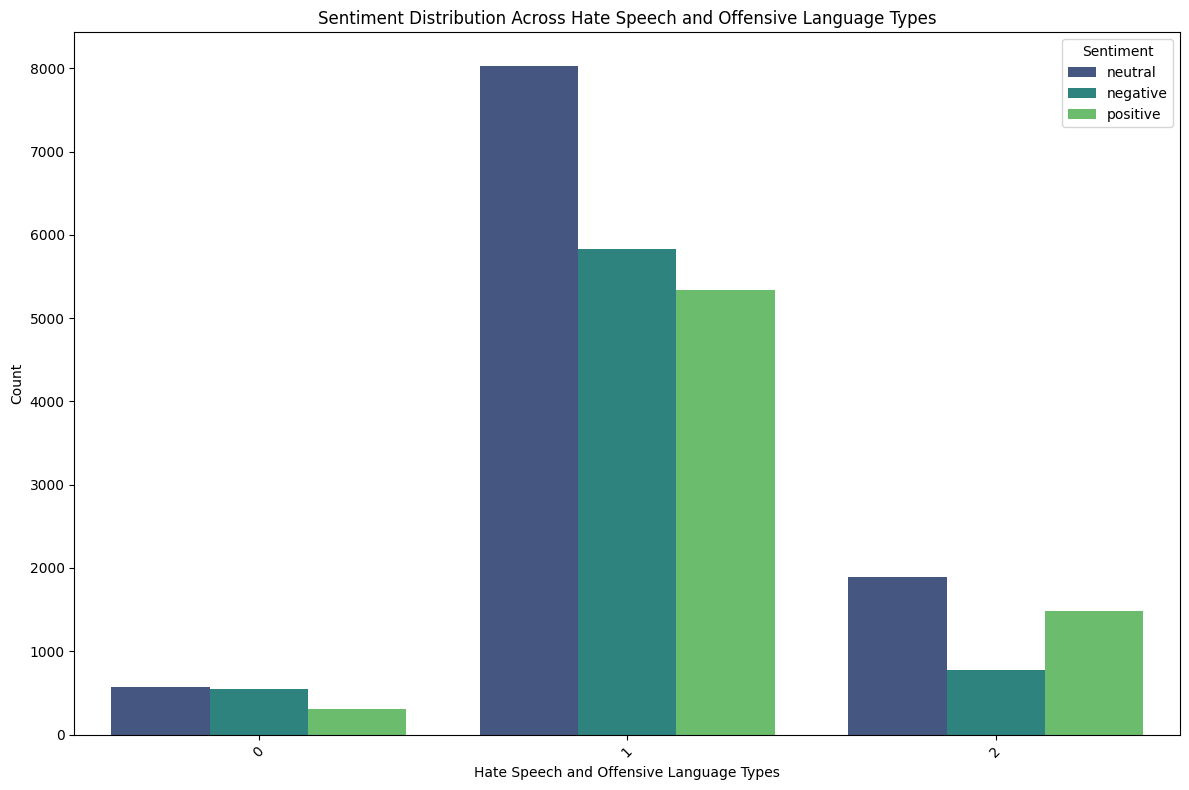

In [80]:
# Group data by 'class' and 'sentiment' columns
sentiment_distribution = df1.groupby(['class', 'sentiment']).size().unstack(fill_value=0)

# Plot the sentiment distribution
plt.figure(figsize=(12, 8))
sns.countplot(x='class', hue='sentiment', data=df1, palette='viridis')
plt.title("Sentiment Distribution Across Hate Speech and Offensive Language Types")
plt.xlabel("Hate Speech and Offensive Language Types")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.legend(title='Sentiment', loc='upper right')
plt.tight_layout()
plt.show()

In [81]:
# Create a DataFrame to store evaluation metrics
evaluation_results = pd.DataFrame({
    'Model': ['Logistic Regression', 'Naive Bayes'],
    'Accuracy': [lr_accuracy, nb_accuracy],
    'Precision': [lr_precision, nb_precision],
    'Recall': [lr_recall, nb_recall],
    'F1 Score': [lr_f1, nb_f1]
})

# Print the evaluation results
print("Sentiment Analysis Model Evaluation Results:")
print(evaluation_results)


Sentiment Analysis Model Evaluation Results:
                 Model  Accuracy  Precision    Recall  F1 Score
0  Logistic Regression  0.878959   0.860558  0.878959  0.864600
1          Naive Bayes  0.847488   0.859783  0.847488  0.810735


In [82]:
import pandas as pd

# Sample data (replace this with your actual data)
data = {
    'hate_type': ['Hate Speech', 'Hate Speech', 'Hate Speech', 'Offensive Language', 'Offensive Language'],
    'sentiment': ['positive', 'negative', 'neutral', 'positive', 'negative']
}
df1 = pd.DataFrame(data)

# Create a DataFrame for sentiment distribution
sentiment_distribution_df1 = df1.groupby(['hate_type', 'sentiment']).size().unstack(fill_value=0)

# Print sentiment distribution
print("\nSentiment Distribution within Each Hate Speech and Offensive Language Type:")
print(sentiment_distribution_df1)



Sentiment Distribution within Each Hate Speech and Offensive Language Type:
sentiment           negative  neutral  positive
hate_type                                      
Hate Speech                1        1         1
Offensive Language         1        0         1


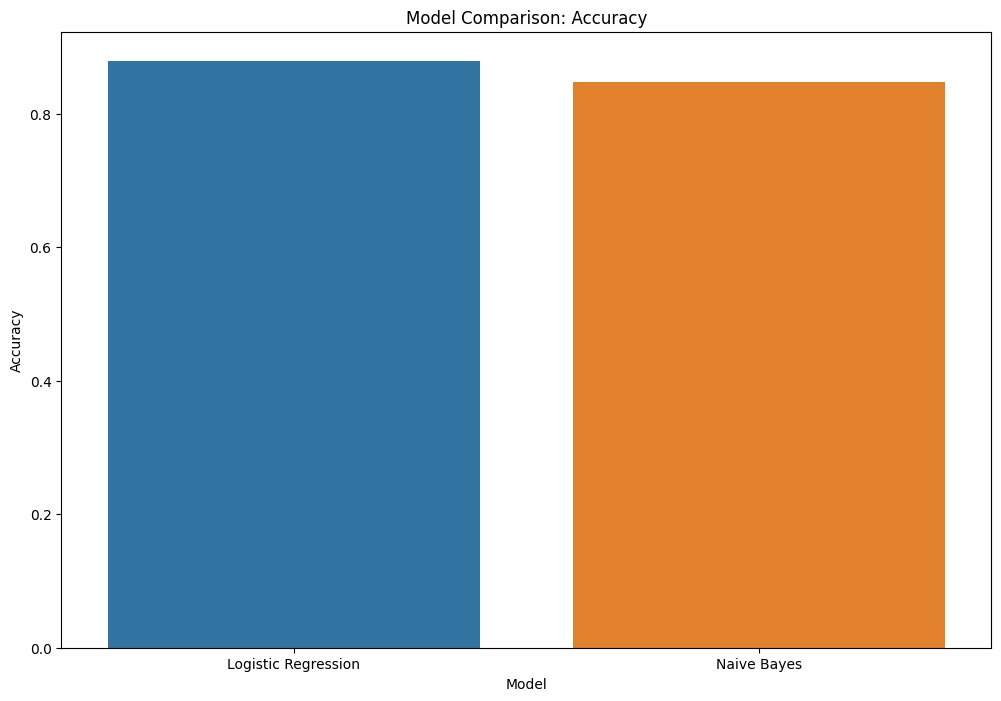

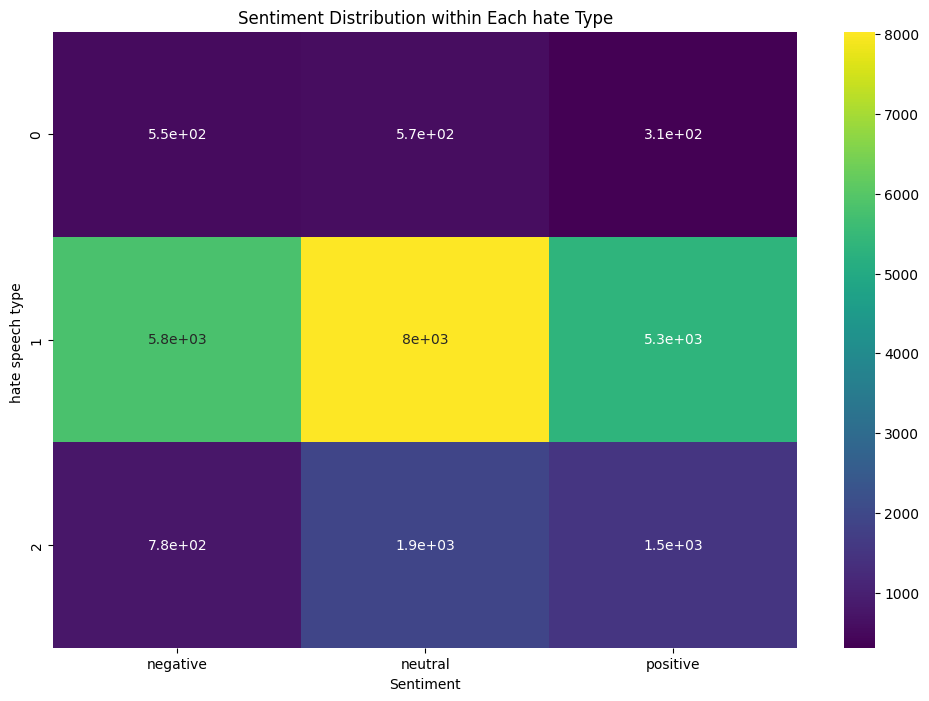

In [83]:
# Create a bar plot for model comparison
plt.figure(figsize=(12, 8))
sns.barplot(x='Model', y='Accuracy', data=evaluation_results)
plt.title('Model Comparison: Accuracy')
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.show()

# Create a heatmap for sentiment distribution
plt.figure(figsize=(12, 8))
sns.heatmap(sentiment_distribution, annot=True, cmap='viridis')
plt.title('Sentiment Distribution within Each hate Type')
plt.xlabel('Sentiment')
plt.ylabel('hate speech type ')
plt.show()

In [84]:

data_df = {
    'cyberbullying_type': ['Type A', 'Type B', 'Type A', 'Type B', 'Type A'],
    'sentiment': ['positive', 'negative', 'neutral', 'positive', 'negative']
}
df = pd.DataFrame(data_df)

data_df1 = {
    'hate_type': ['Hate Speech', 'Hate Speech', 'Hate Speech', 'Offensive Language', 'Offensive Language'],
    'sentiment': ['positive', 'negative', 'neutral', 'positive', 'negative']
}
df1 = pd.DataFrame(data_df1)

# Create a DataFrame for sentiment distribution within each cyberbullying type
sentiment_distribution_df = df.groupby(['cyberbullying_type', 'sentiment']).size().unstack(fill_value=0)

# Create a DataFrame for sentiment distribution within each hate speech type
sentiment_distribution_df1 = df1.groupby(['hate_type', 'sentiment']).size().unstack(fill_value=0)

# Print sentiment distribution for cyberbullying
print("\nSentiment Distribution within Each Cyberbullying Type:")
print(sentiment_distribution_df)

# Print sentiment distribution for hate speech
print("\nSentiment Distribution within Each Hate Speech Type:")
print(sentiment_distribution_df1)



Sentiment Distribution within Each Cyberbullying Type:
sentiment           negative  neutral  positive
cyberbullying_type                             
Type A                     1        1         1
Type B                     1        0         1

Sentiment Distribution within Each Hate Speech Type:
sentiment           negative  neutral  positive
hate_type                                      
Hate Speech                1        1         1
Offensive Language         1        0         1


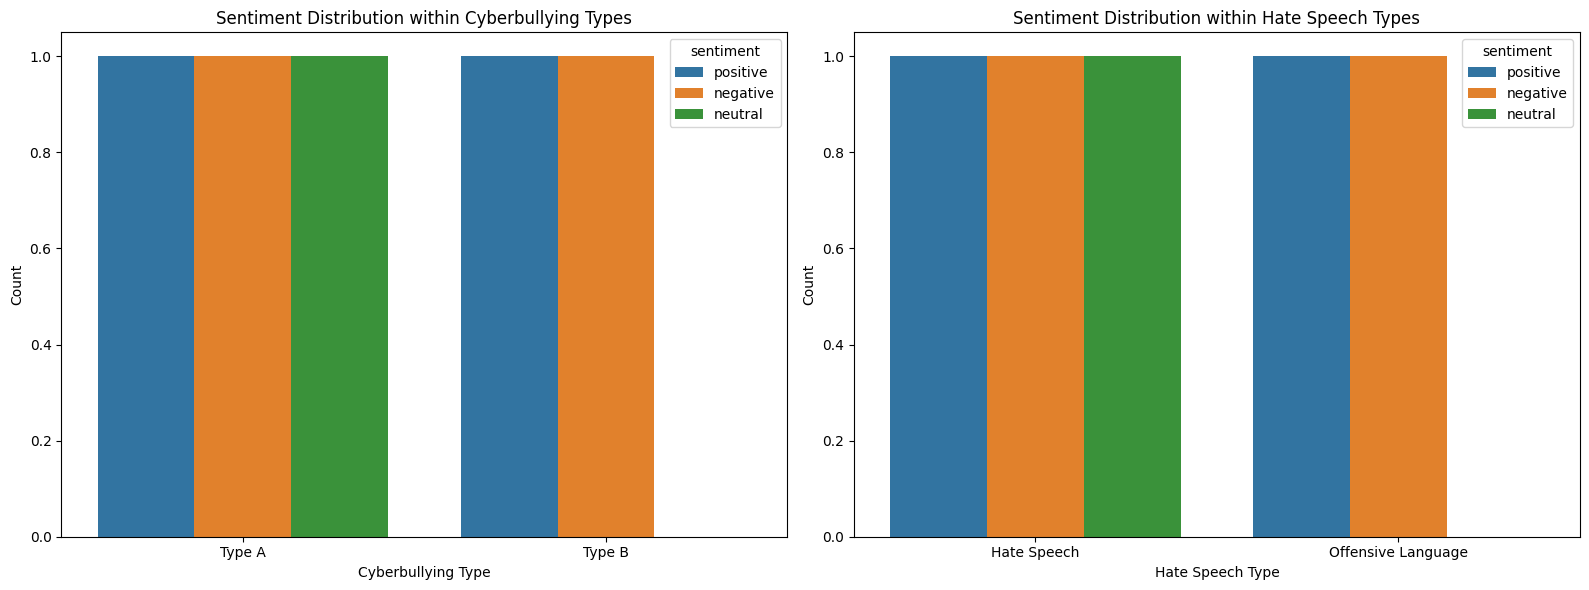

In [85]:
# Set up subplots for comparison
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Plot sentiment distribution for cyberbullying
sns.countplot(x='cyberbullying_type', hue='sentiment', data=df, ax=axes[0])
axes[0].set_title("Sentiment Distribution within Cyberbullying Types")
axes[0].set_xlabel("Cyberbullying Type")
axes[0].set_ylabel("Count")

# Plot sentiment distribution for hate speech
sns.countplot(x='hate_type', hue='sentiment', data=df1, ax=axes[1])
axes[1].set_title("Sentiment Distribution within Hate Speech Types")
axes[1].set_xlabel("Hate Speech Type")
axes[1].set_ylabel("Count")

plt.tight_layout()
plt.show()
